In [1]:
from datascience import *
path_data = 'https://github.com/data-8/textbook/raw/gh-pages/data/'
births = Table.read_table(path_data + 'baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [2]:
smoking_and_birthweight = births.select('Maternal Smoker', 
                                        'Birth Weight')
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


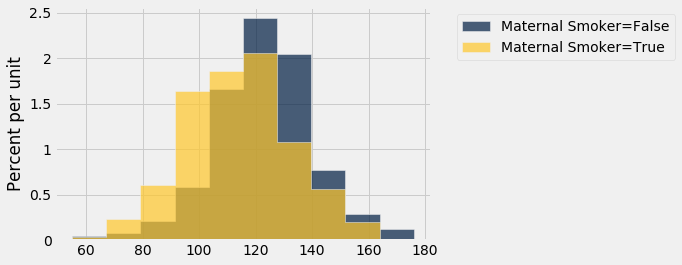

In [3]:
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
smoking_and_birthweight.hist('Birth Weight', group = 'Maternal Smoker')

In [4]:
import numpy as np
means_table = smoking_and_birthweight.group('Maternal Smoker', np.average)
means_table

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


In [5]:
means = means_table.column(1)
observed_difference = means.item(1) - means.item(0)
observed_difference

-9.266142572024918

In [6]:
def difference_of_means(table, label, group_label):
    reduced = table.select(label, group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

difference_of_means(births, 'Birth Weight', 'Maternal Smoker')    

-9.266142572024918

In [7]:
smoking_and_birthweight

Maternal Smoker,Birth Weight
False,120
False,113
True,128
True,108
False,136
False,138
False,132
False,120
True,143
False,140


In [8]:
shuffled_labels = smoking_and_birthweight.sample\
   (with_replacement = False).column(0)
original_and_shuffled = smoking_and_birthweight.with_column\
    ('Shuffled Label', shuffled_labels)
original_and_shuffled

Maternal Smoker,Birth Weight,Shuffled Label
False,120,True
False,113,True
True,128,True
True,108,True
False,136,True
False,138,False
False,132,True
False,120,False
True,143,True
False,140,False


In [9]:
shuffled_only = original_and_shuffled.drop('Maternal Smoker')
shuffled_group_means = shuffled_only.group('Shuffled Label',
                                           np.average)
shuffled_group_means

Shuffled Label,Birth Weight average
False,119.352
True,119.634


In [10]:
difference_of_means(original_and_shuffled, 'Birth Weight',
                                        'Shuffled Label')

0.2815393756570188

In [11]:
difference_of_means(original_and_shuffled, 'Birth Weight',
                                     'Maternal Smoker')

-9.266142572024918

In [0]:
def one_simulated_difference(table, label, group_label):
    shuffled_labels = table.sample(with_replacement = False
                                       ).column(group_label)
    shuffled_table = table.select(label).with_column(
        'Shuffled Label', shuffled_labels)
    return difference_of_means(shuffled_table, 
                                   label, 'Shuffled Label')  

In [13]:
one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')

0.13129484894190568

In [0]:
differences = make_array()
repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference(births, 'Birth Weight',
                                              'Maternal Smoker')
    differences = np.append(differences, new_difference)     

Observed Difference: -9.266142572024918


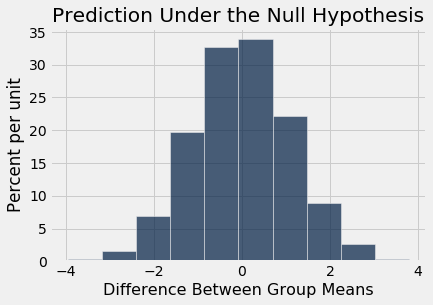

In [15]:
Table().with_column('Difference Between Group Means', differences).hist()
print('Observed Difference:', observed_difference)
plots.title('Prediction Under the Null Hypothesis');

In [16]:
empirical_P = np.count_nonzero\
  (differences <= observed_difference) / repetitions
empirical_P

0.0

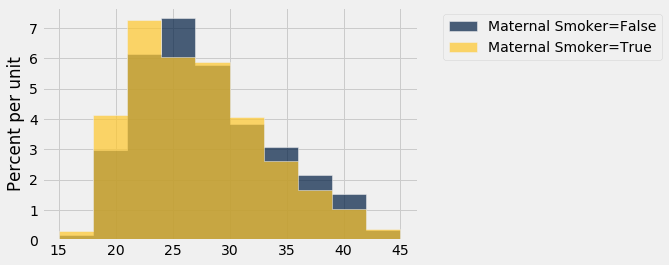

In [17]:
smoking_and_age = births.select('Maternal Smoker', 'Maternal Age')
smoking_and_age.hist('Maternal Age', group = 'Maternal Smoker')

In [18]:
observed_age_difference = difference_of_means(births, 'Maternal Age', 'Maternal Smoker')
observed_age_difference

-0.8076725017901509

In [0]:
age_differences = make_array()
repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference(births, 'Maternal Age',
                                              'Maternal Smoker')
    age_differences = np.append(age_differences, new_difference)

Observed Difference: -0.8076725017901509


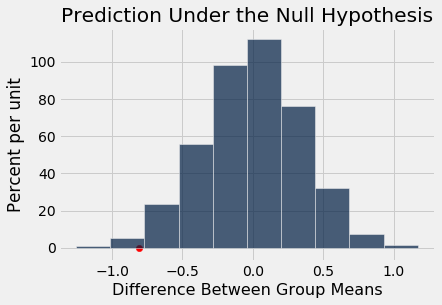

In [20]:
Table().with_column('Difference Between Group Means', age_differences).hist()
plots.scatter(observed_age_difference, 0, color='red', s=40)
plots.title('Prediction Under the Null Hypothesis')
print('Observed Difference:', observed_age_difference)

In [21]:
empirical_P = np.count_nonzero\
(age_differences <= observed_age_difference) / 5000
empirical_P

0.0108